In [ ]:
#Assignment-4 by Partha Aakash Cheepurupalli


# **1.Download the Employee Attrition Dataset**


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import seaborn as sns

In [8]:
df=pd.read_csv("/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls")

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **2.Perfrom Data Preprocessing**


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<ipython-input-15-e85bed7e9e61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

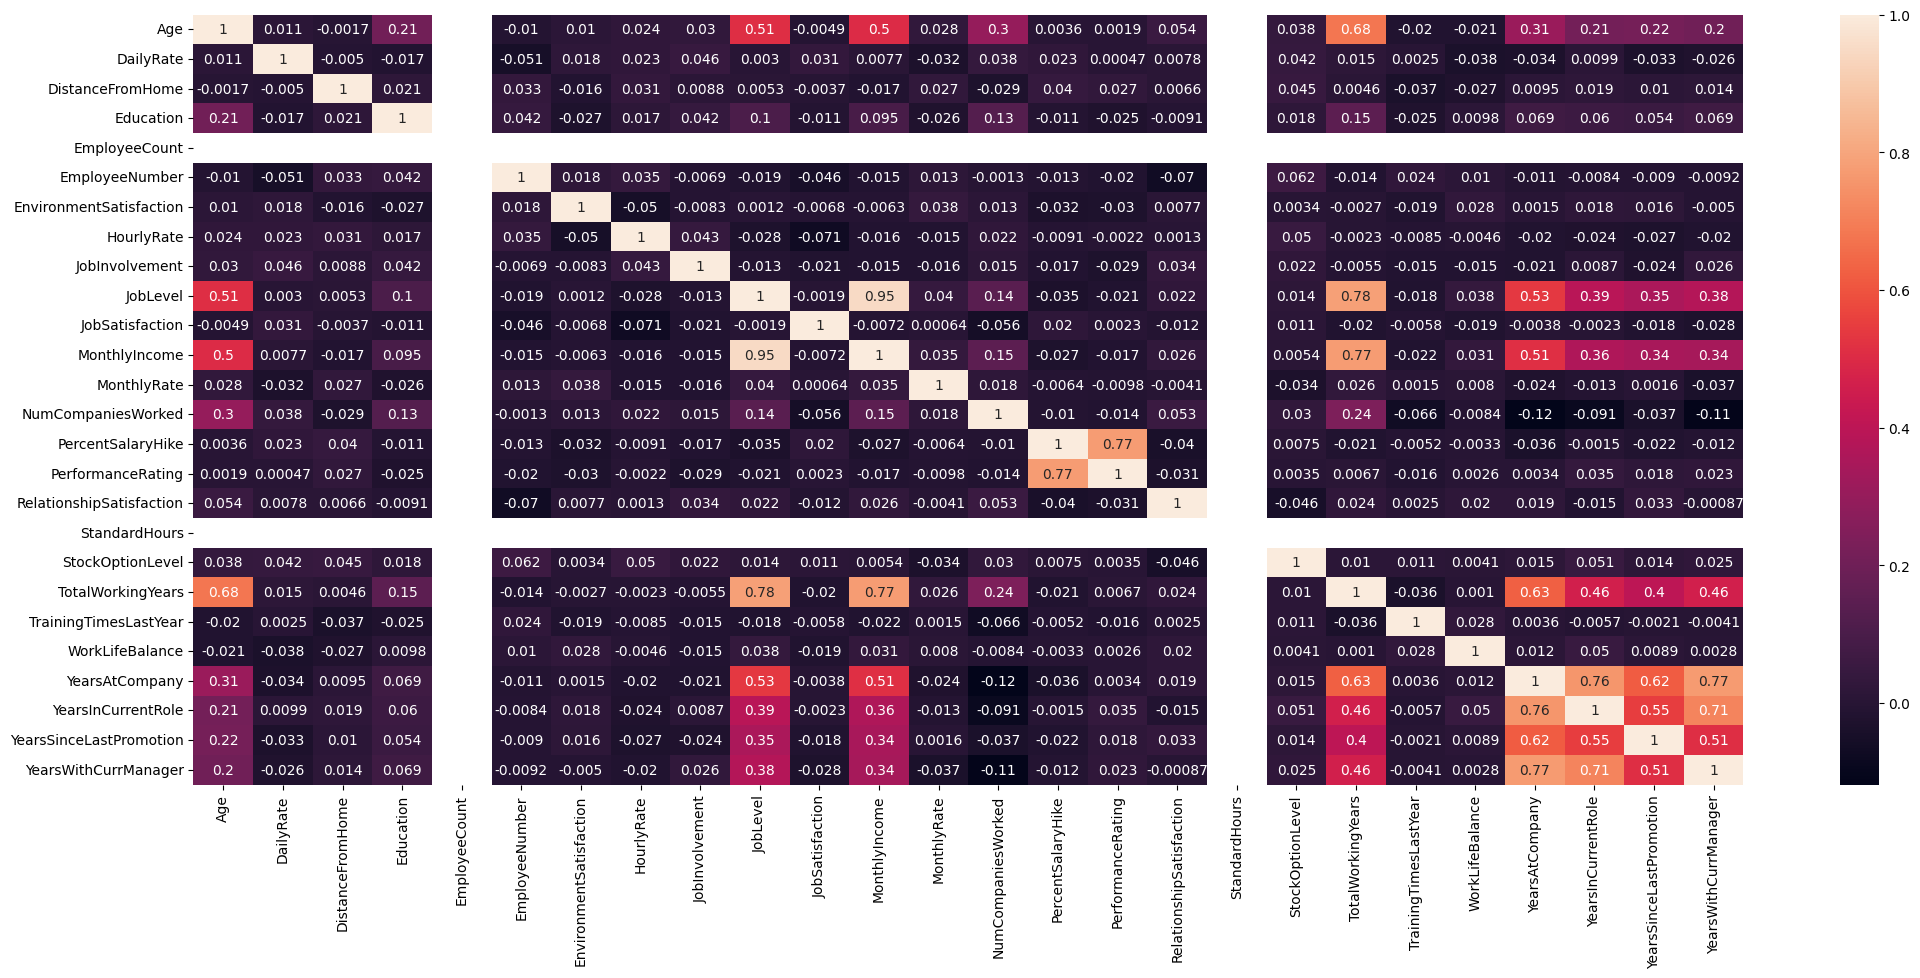

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
len(df.columns)

35

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
x=df.drop("Attrition",axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [20]:
y1=df.Attrition
y=y1.to_frame()
y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.BusinessTravel=le.fit_transform(x.BusinessTravel)
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


In [22]:
x['Department']=le.fit_transform(x['Department'])
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Human Resources' 'Research & Development' 'Sales']
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


In [23]:
x.EducationField=le.fit_transform(x.EducationField)
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


In [24]:
x.Gender=le.fit_transform(x.Gender)
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Female' 'Male']
{'Female': 0, 'Male': 1}


In [25]:
x.JobRole=le.fit_transform(x.JobRole)
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}


In [26]:
x.MaritalStatus=le.fit_transform(x.MaritalStatus)
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Divorced' 'Married' 'Single']
{'Divorced': 0, 'Married': 1, 'Single': 2}


In [27]:
x.Over18 =le.fit_transform(x.Over18 )
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['Y']
{'Y': 0}


In [28]:
x.OverTime =le.fit_transform(x.OverTime )
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['No' 'Yes']
{'No': 0, 'Yes': 1}


In [29]:
y.Attrition =le.fit_transform(y.Attrition )
print(le.classes_)
mapping=dict(zip(le.classes_,range(len(le.classes_))))
print(mapping)

['No' 'Yes']
{'No': 0, 'Yes': 1}


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeCount             1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [31]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [32]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [34]:
x_scaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [35]:
x_scaled.shape

(1470, 34)

In [36]:
y.shape

(1470, 1)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176, 1)
(294, 1)



# **3.Model Building using Logistic Regression and Decision Tree**


In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
y_pred=lr.predict(x_test)

In [41]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
y_test

,Attrition
1291,1
1153,1
720,1
763,0
976,0
...,...
302,0
443,1
701,0
309,0


In [43]:
print(pd.DataFrame({"Actual":y_test.Attrition,"Predicted":y_pred}))

      Actual  Predicted
1291       1          0
1153       1          1
720        1          1
763        0          0
976        0          0
...      ...        ...
302        0          0
443        1          0
701        0          0
309        0          0
845        0          0

[294 rows x 2 columns]


In [44]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve

In [45]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       236
           1       0.76      0.22      0.35        58

    accuracy                           0.83       294
   macro avg       0.80      0.60      0.63       294
weighted avg       0.82      0.83      0.79       294



In [47]:
y_probability=lr.predict_proba(x_test)[:,1]

In [48]:
fpr,tpr,thresholds=roc_curve(y_test,y_probability)

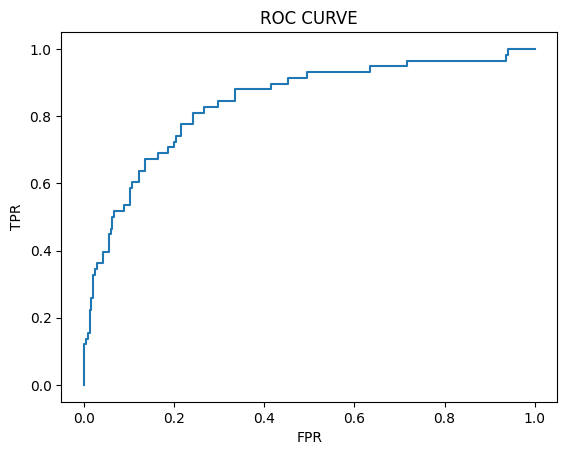

In [49]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# **Hyperparameter Tuning (Logistic Regression)**

In [50]:
from sklearn.model_selection import GridSearchCV
# Define a range of hyperparameters to search
param_grid = {
 'penalty': ['l1', 'l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
 'solver': ['liblinear', 'saga']
}
# Create a logistic regression classifier
lr = LogisticRegression()
# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [51]:
# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [52]:
# Get the best model
best_lr = grid_search.best_estimator_
best_lr

LogisticRegression(C=10, penalty='l1', solver='saga')

In [53]:
# Evaluate the best model on the test set
y_pred_best = best_lr.predict(x_test)
print(pd.DataFrame({"Actual":y_test.Attrition,"Predicted":y_pred_best}))

      Actual  Predicted
1291       1          0
1153       1          1
720        1          1
763        0          0
976        0          0
...      ...        ...
302        0          0
443        1          0
701        0          0
309        0          0
845        0          0

[294 rows x 2 columns]


In [54]:
# Calculate accuracy and other metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)
print("Accuracy with Best Hyperparameters:", accuracy_best)
print("Classification Report with Best Hyperparameters:\n", classification_report_best)

Accuracy with Best Hyperparameters: 0.8469387755102041
Classification Report with Best Hyperparameters:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       236
           1       0.78      0.31      0.44        58

    accuracy                           0.85       294
   macro avg       0.82      0.64      0.68       294
weighted avg       0.84      0.85      0.82       294



# **Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred=dtc.predict(x_test)

In [58]:
print(pd.DataFrame({"Actual":y_test.Attrition,"Predicted":y_pred}))

      Actual  Predicted
1291       1          0
1153       1          1
720        1          0
763        0          0
976        0          0
...      ...        ...
302        0          1
443        1          0
701        0          0
309        0          0
845        0          0

[294 rows x 2 columns]


In [59]:
accuracy_score(y_test,y_pred)

0.7653061224489796

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       236
           1       0.37      0.28      0.32        58

    accuracy                           0.77       294
   macro avg       0.60      0.58      0.59       294
weighted avg       0.74      0.77      0.75       294



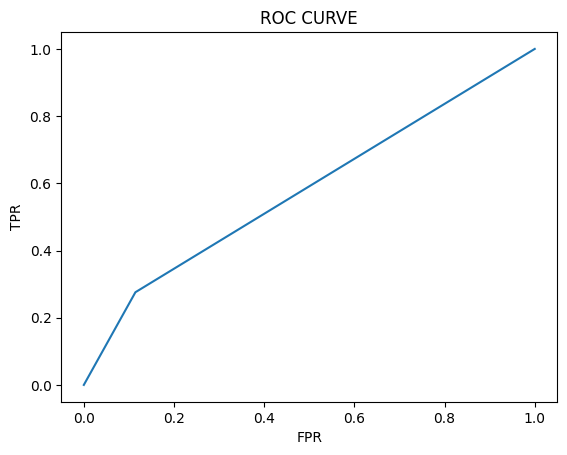

In [61]:
y_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# **Hyperparameter tuning(Pre Pruning) for Decision Tree**

In [62]:
para={
 'criterion':['entropy','gini'],
 'splitter':['best','random'],
 'max_features':['auto','sqrt','log2'],
 'max_depth':list(range(0,10))

}

In [63]:
grid_dtc=GridSearchCV(dtc,para,cv=10,scoring='accuracy')

In [64]:
grid_dtc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
grid_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

In [66]:
best_dtc=DecisionTreeClassifier(
 criterion=grid_dtc.best_params_['criterion'],
 max_depth=grid_dtc.best_params_['max_depth'],
 max_features=grid_dtc.best_params_["max_features"],
 splitter=grid_dtc.best_params_["splitter"] )
best_dtc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=4, max_features='auto')

In [68]:
y_pred=best_dtc.predict(x_test)
print(pd.DataFrame({"Actual":y_test.Attrition,"Predicted":y_pred}))

      Actual  Predicted
1291       1          0
1153       1          1
720        1          0
763        0          1
976        0          0
...      ...        ...
302        0          0
443        1          0
701        0          0
309        0          0
845        0          0

[294 rows x 2 columns]


In [69]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8163265306122449
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       236
           1       0.58      0.26      0.36        58

    accuracy                           0.82       294
   macro avg       0.71      0.61      0.62       294
weighted avg       0.79      0.82      0.79       294



[Text(0.5431034482758621, 0.9, 'x[30] <= 0.038\ngini = 0.258\nsamples = 1176\nvalue = [997, 179]'),
 Text(0.27586206896551724, 0.7, 'x[27] <= 0.088\ngini = 0.444\nsamples = 171\nvalue = [114, 57]'),
 Text(0.13793103448275862, 0.5, 'x[1] <= 0.25\ngini = 0.499\nsamples = 78\nvalue = [41, 37]'),
 Text(0.06896551724137931, 0.3, 'x[30] <= 0.013\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.20689655172413793, 0.3, 'x[17] <= 0.006\ngini = 0.494\nsamples = 65\nvalue = [29, 36]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.499\nsamples = 61\nvalue = [29, 32]'),
 Text(0.41379310344827586, 0.5, 'x[4] <= 0.464\ngini = 0.338\nsamples = 93\nvalue = [73, 20]'),
 Text(0.3448275862068966, 0.3, 'x[9] <= 0.167\ngini = 0.271\nsamples = 68\nvalue = [57, 11]'),
 Text(0.31034

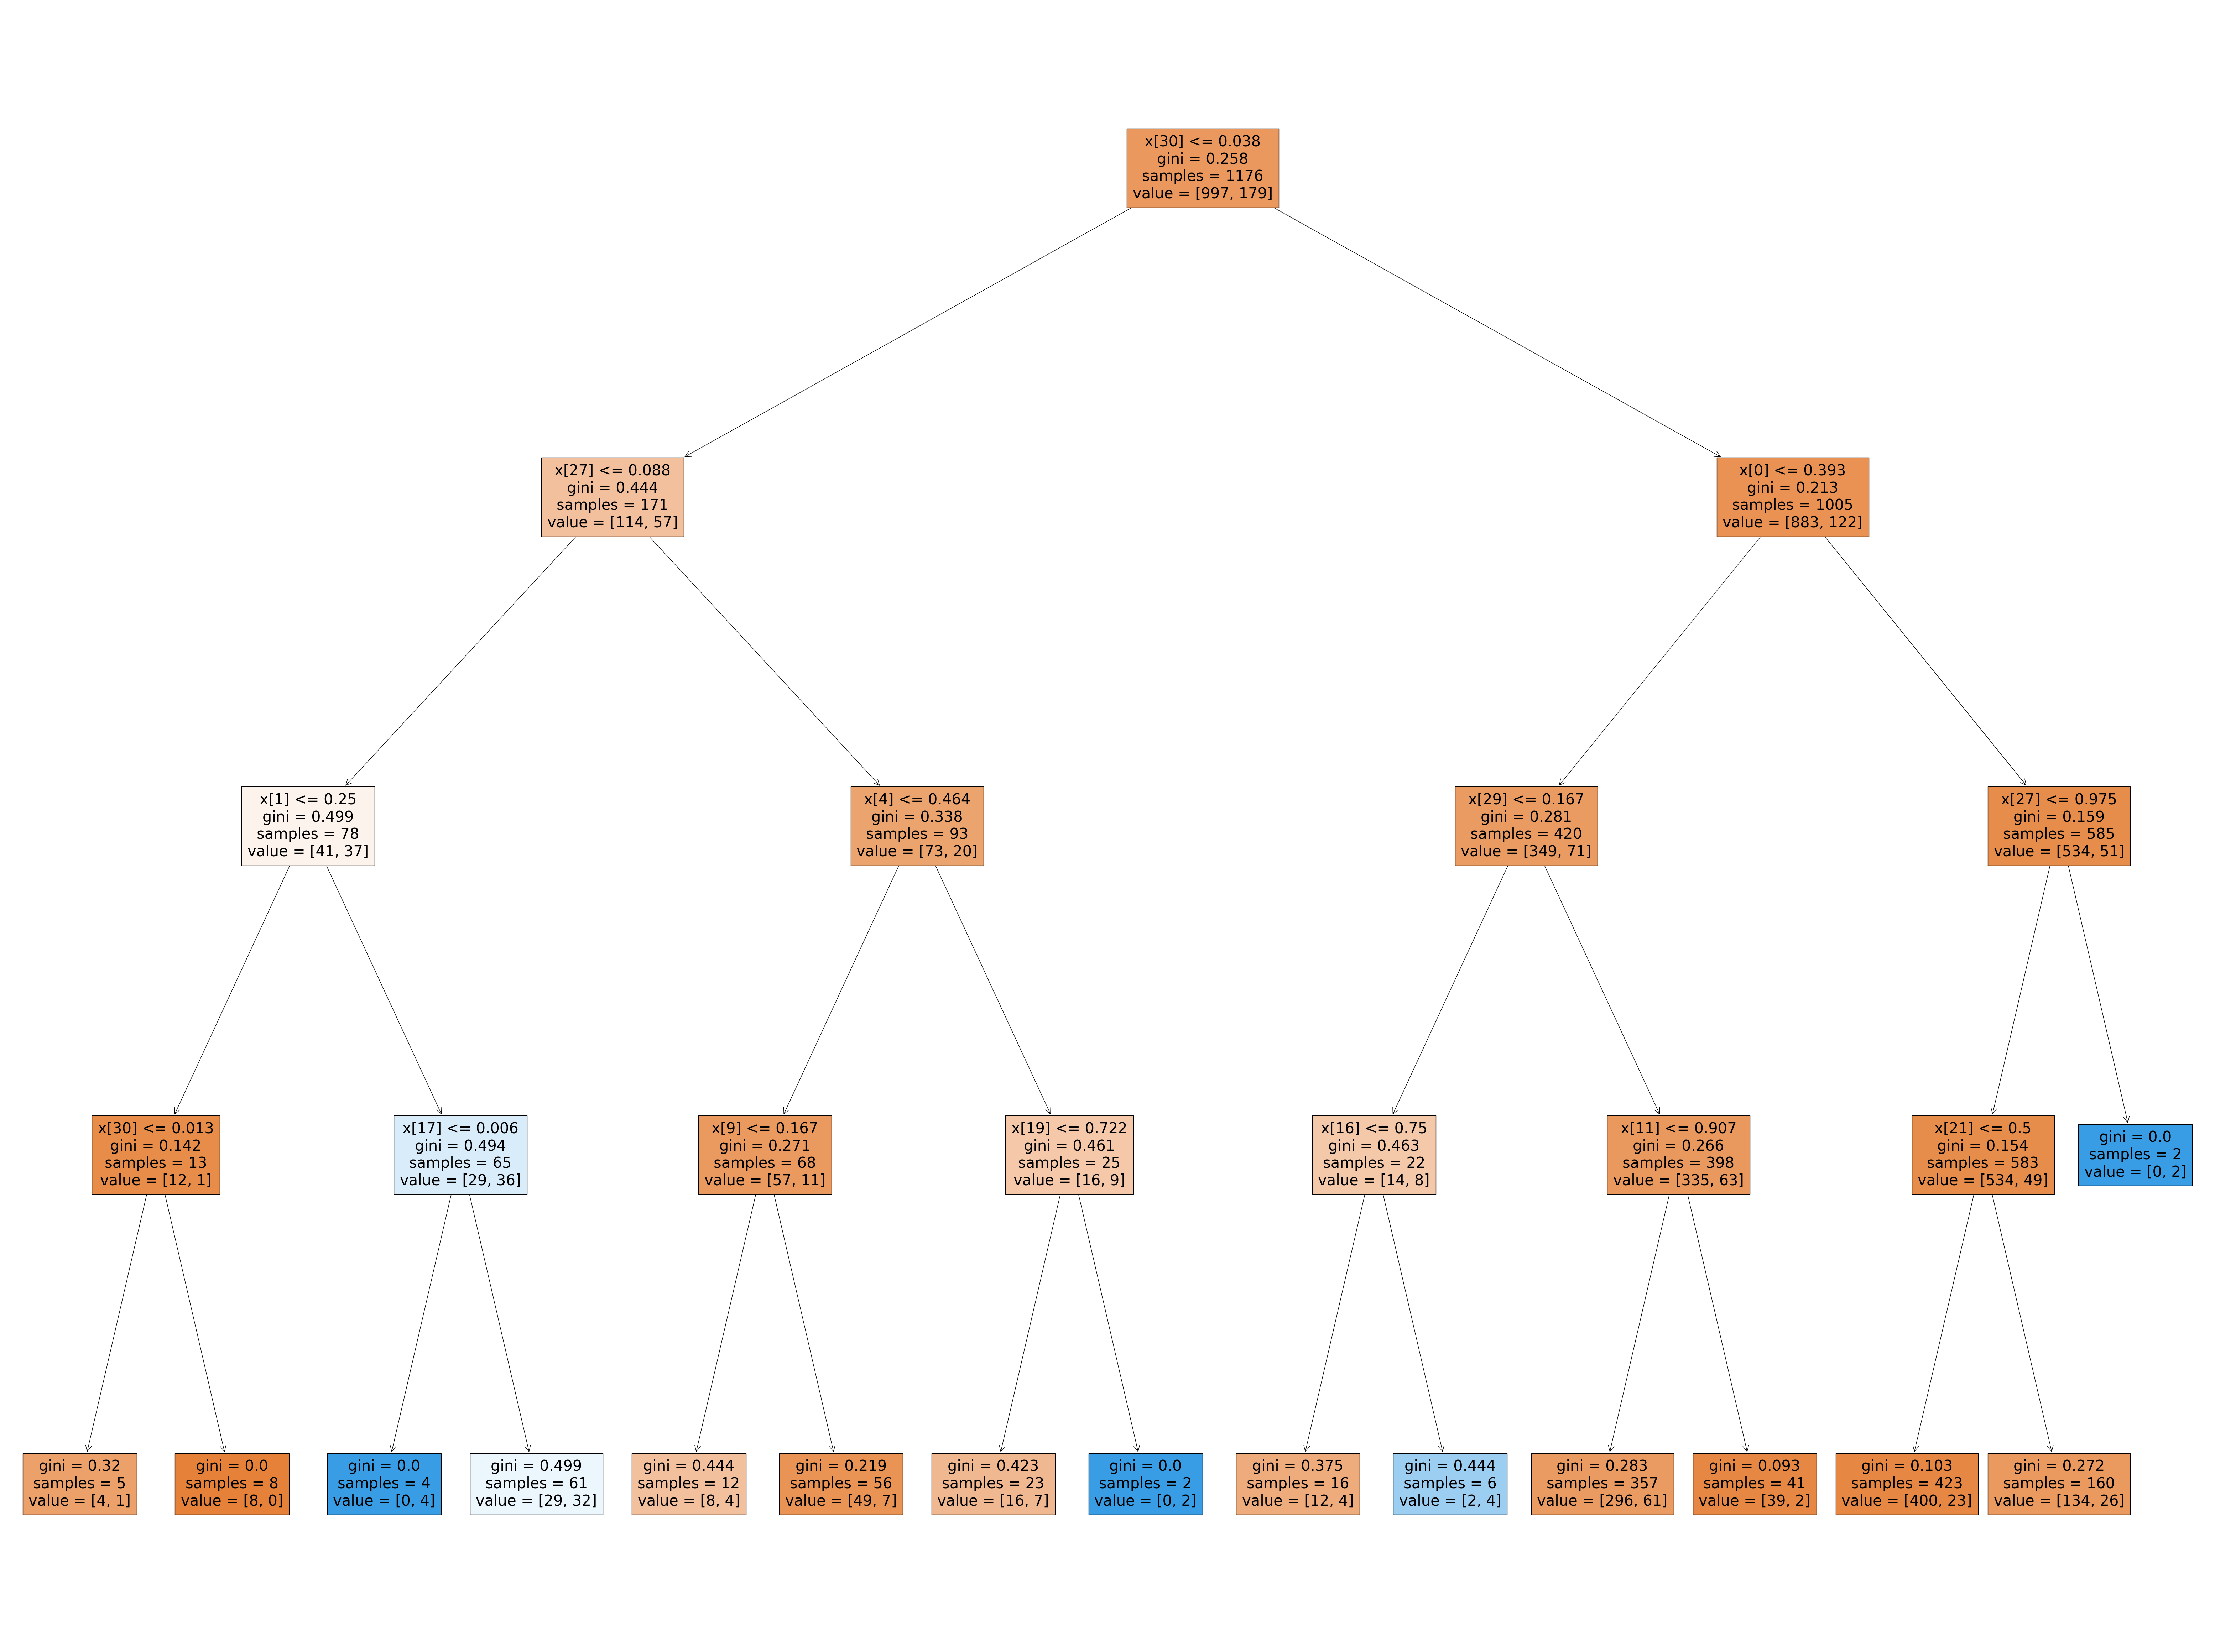

In [70]:
from sklearn import tree
plt.figure(figsize=(80,60))
tree.plot_tree(best_dtc,filled=True)


# **Random Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [72]:
rfc.fit(x_train,y_train)

<ipython-input-72-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [73]:
y_pred=rfc.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)

0.8197278911564626

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       236
           1       0.73      0.14      0.23        58

    accuracy                           0.82       294
   macro avg       0.78      0.56      0.56       294
weighted avg       0.80      0.82      0.77       294



# **Pre pruning Random Forest**

In [76]:
para={
 'criterion':['gini','entropy'],
 'max_features':['best','sqrt','log2',None],
 'max_depth':[10, 20, 30, None],
}

In [77]:
rfc_cv=GridSearchCV(rfc,para,cv=5,scoring="accuracy")

In [78]:
rfc_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['best', 'sqrt', 'log2', None]},
             scoring='accuracy')

In [79]:
rfc_cv.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None}

In [80]:
best_rfc=RandomForestClassifier(
 criterion=rfc_cv.best_params_['criterion'],
 max_depth=rfc_cv.best_params_['max_depth'],
 max_features=rfc_cv.best_params_["max_features"],
)

In [81]:
best_rfc.fit(x_train,y_train)

<ipython-input-81-ba57def475a4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, max_features=None)

In [82]:
y_pred=best_rfc.predict(x_test)

In [83]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.826530612244898
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       236
           1       0.68      0.22      0.34        58

    accuracy                           0.83       294
   macro avg       0.76      0.60      0.62       294
weighted avg       0.81      0.83      0.79       294



In [84]:
y_prob=best_rfc.predict_proba(x_test)[:,1]

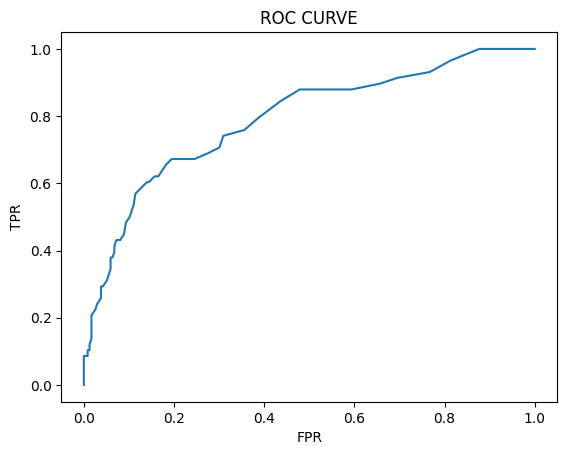

In [85]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()